## **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

## **Load Data**

In [ ]:
df= pd.read_csv('/content/early_diabetes_data_upload.csv')

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.shape

(520, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## **EDA**

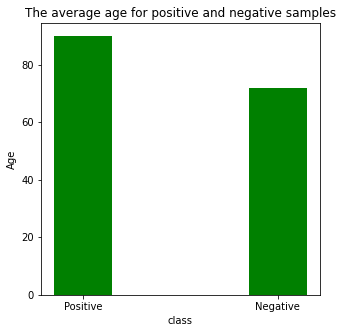

In [ ]:

fig = plt.figure(figsize = (5, 5))
plt.bar(df['class'], df['Age'], color ='green',width=0.3)
plt.xlabel("class")
plt.ylabel("Age")
plt.title("The average age for positive and negative samples")
plt.show()

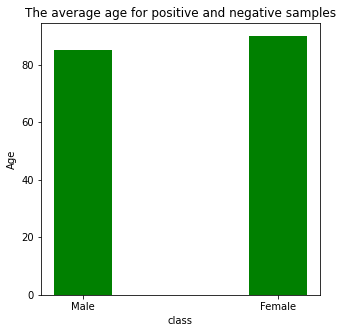

In [ ]:
fig = plt.figure(figsize = (5, 5))
plt.bar(df['Gender'], df['Age'], color ='green' , width=0.3)
plt.xlabel("class")
plt.ylabel("Age")
plt.title("The average age for positive and negative samples")
plt.show()

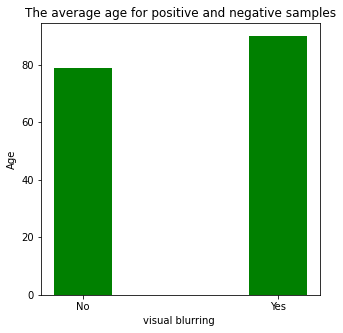

In [ ]:

fig = plt.figure(figsize = (5, 5))
plt.bar(df['visual blurring'], df['Age'], color ='green', width=0.3)
plt.xlabel("visual blurring ")
plt.ylabel("Age")
plt.title("The average age for positive and negative samples")
plt.show()

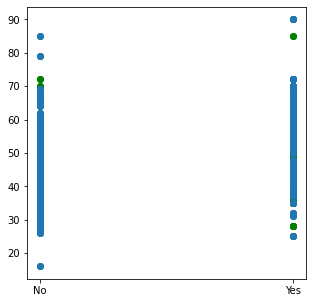

In [ ]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(df['visual blurring'], df['Age'], color ='green')
plt.scatter(df['Alopecia'], df['Age'])

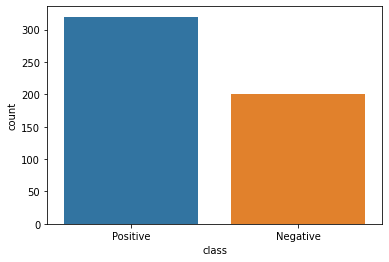

In [ ]:

sns.countplot(df['class'])


## **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
df['Age']=mms.fit_transform(df[['Age']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
Gender= LabelEncoder()
Polyuria= LabelEncoder()
Polydispsia= LabelEncoder()
sudden_weight_loss= LabelEncoder()
weakness= LabelEncoder()
Polyphagia= LabelEncoder()
Genital_thrush= LabelEncoder()
visual_blurring= LabelEncoder()
Itching= LabelEncoder()
Irritability= LabelEncoder()
delayed_healing= LabelEncoder()
partial_paresis= LabelEncoder()
muscle_stiffness= LabelEncoder() 
Alopecia= LabelEncoder()
Obesity= LabelEncoder()
Class = LabelEncoder()

df['Gender']=Gender.fit_transform(df['Gender'])
df['Polyuria']=Polyuria.fit_transform(df['Polyuria'])
df['Polydipsia']=Polydispsia.fit_transform(df['Polydipsia'])
df['sudden weight loss']=sudden_weight_loss.fit_transform(df['sudden weight loss'])
df['weakness']=weakness.fit_transform(df['weakness'])
df['Polyphagia']=Polyphagia.fit_transform(df['Polyphagia'])
df['Genital thrush']=Genital_thrush.fit_transform(df['Genital thrush'])
df['visual blurring']=visual_blurring.fit_transform(df['visual blurring'])
df['Itching']=Itching.fit_transform(df['Itching'])
df['Irritability']=Irritability.fit_transform(df['Irritability'])
df['delayed healing']=delayed_healing.fit_transform(df['delayed healing'])
df['partial paresis']=partial_paresis.fit_transform(df['partial paresis'])
df['muscle stiffness']=muscle_stiffness.fit_transform(df['muscle stiffness'])
df['Alopecia']=Alopecia.fit_transform(df['Alopecia'])
df['Obesity']=Obesity.fit_transform(df['Obesity'])
df['class']=Class.fit_transform(df['class'])

In [ ]:
df.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1


In [ ]:
x=df.drop(['class'], axis=1)
y= df['class']

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(390, 16)
(130, 16)


## **Model Building**

**Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(x_train,y_train)

LogisticRegression()

**Score**

In [ ]:
test = 8/130
train=28/390
print('test error=',test)
print('train error=',train)
print('---------------------------------------------------')

print('test Accuracy', Logreg.score(x_test,y_test))
print('train Accuracy', Logreg.score(x_train,y_train))


test error= 0.06153846153846154
train error= 0.07179487179487179
---------------------------------------------------
test Accuracy 0.9384615384615385
train Accuracy 0.9282051282051282


**Confusion Matrix**

Text(42.0, 0.5, 'Truth')

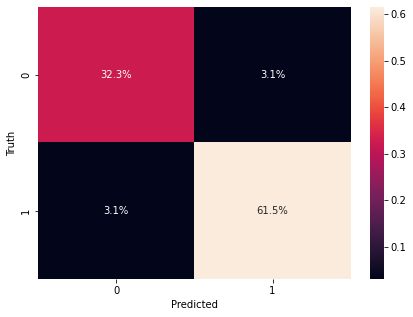

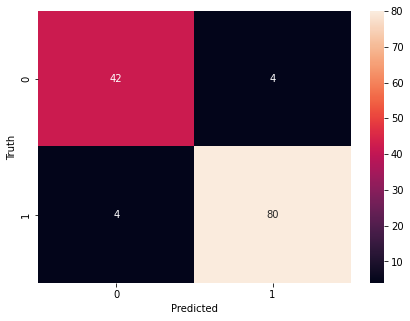

In [ ]:

pred1 = Logreg.predict(x_test)
cm = confusion_matrix(y_test,pred1)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(42.0, 0.5, 'Truth')

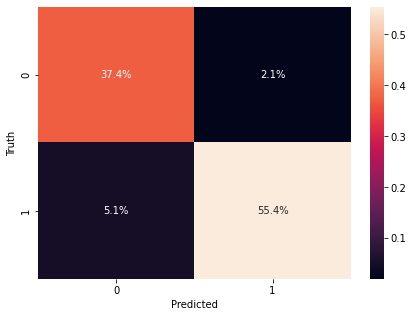

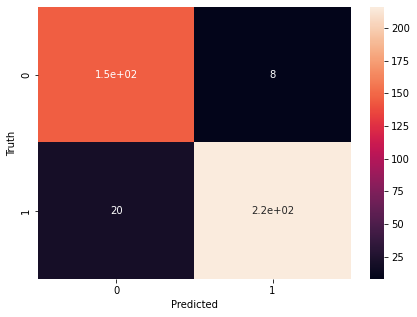

In [ ]:

pred1 = Logreg.predict(x_train)
cm = confusion_matrix(y_train,pred1)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

SVC()

**Score**

In [ ]:
test = 3/130
train=8/390
print('test error=',test)
print('train error=',train)
print('---------------------------------------------------')
print('test Accuracy=', svm.score(x_test,y_test))
print('train Accuracy=', svm.score(x_train,y_train))

test error= 0.023076923076923078
train error= 0.020512820512820513
---------------------------------------------------
test Accuracy= 0.9769230769230769
train Accuracy= 0.9794871794871794


**Confusion Matrix**

Text(42.0, 0.5, 'Truth')

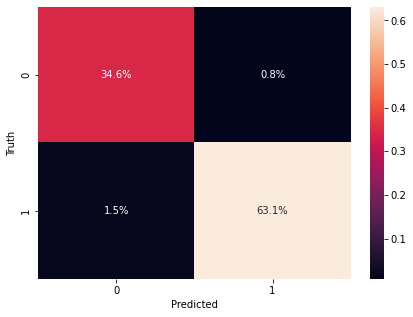

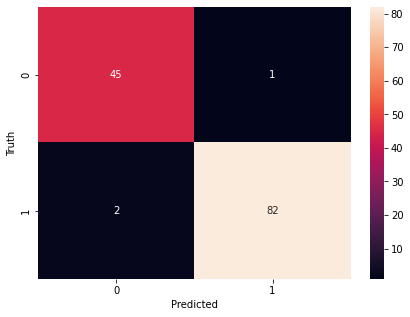

In [ ]:

pred2 = svm.predict(x_test)
cm = confusion_matrix(y_test,pred2)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(42.0, 0.5, 'Truth')

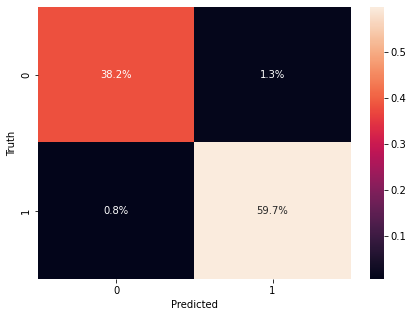

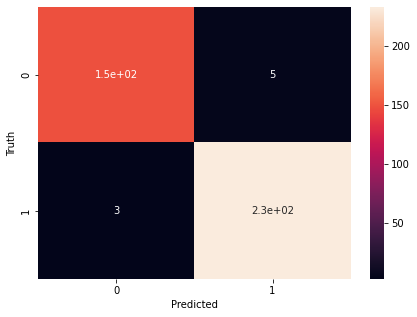

In [ ]:
pred2 = svm.predict(x_train)
cm = confusion_matrix(y_train,pred2)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
min_samples_split= 2
DT=DecisionTreeClassifier(criterion='entropy',min_samples_split=min_samples_split)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

**Score**

In [ ]:
test = 1/130
train=0.1/390
print('test error=',test)
print('train error=',train)
print('---------------------------------------------------')

print('test Accuracy', DT.score(x_test,y_test))
print('train Accuracy', DT.score(x_train,y_train))

test error= 0.007692307692307693
train error= 0.0002564102564102564
---------------------------------------------------
test Accuracy 0.9769230769230769
train Accuracy 1.0


**Confusion Matrix**

Text(42.0, 0.5, 'Truth')

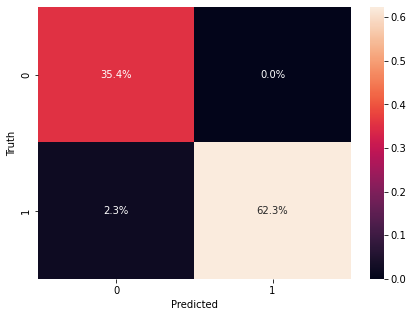

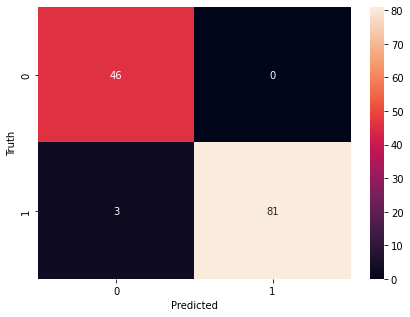

In [ ]:

pred3 = DT.predict(x_test)
cm = confusion_matrix(y_test,pred3)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(42.0, 0.5, 'Truth')

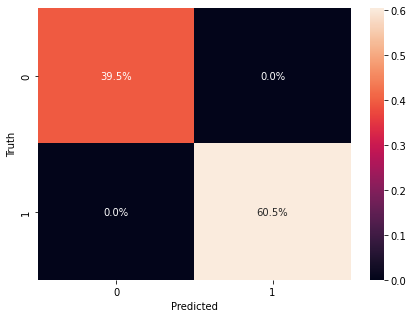

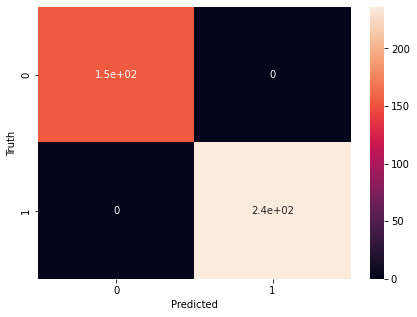

In [ ]:
pred3 = DT.predict(x_train)
cm = confusion_matrix(y_train,pred3)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

***RandomForestClassifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rn = RandomForestClassifier()
rn.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
test = 1/130
train=0.1/390
print('test error=',test)
print('train error=',train)
print('---------------------------------------------------')

print('test Accuracy', rn.score(x_test,y_test))
print('train Accuracy', rn.score(x_train,y_train))

test error= 0.007692307692307693
train error= 0.0002564102564102564
---------------------------------------------------
test Accuracy 1.0
train Accuracy 1.0


**Confusion matrix**

Text(42.0, 0.5, 'Truth')

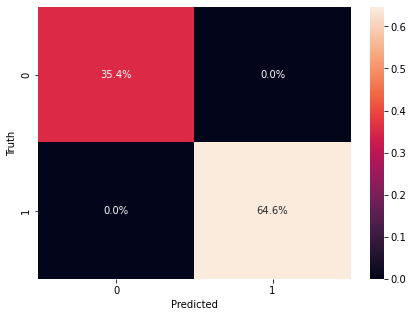

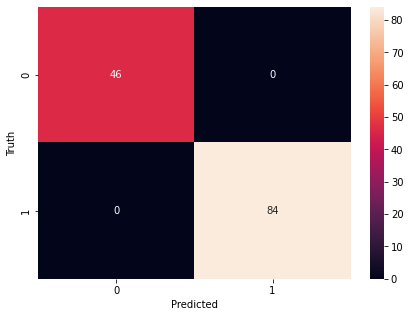

In [ ]:

pred4 = rn.predict(x_test)
cm = confusion_matrix(y_test,pred4)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(42.0, 0.5, 'Truth')

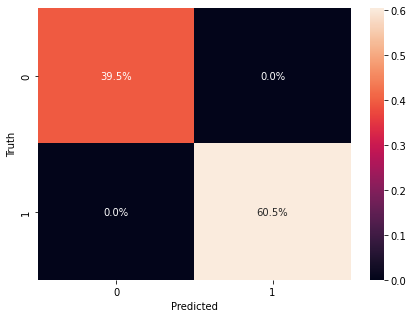

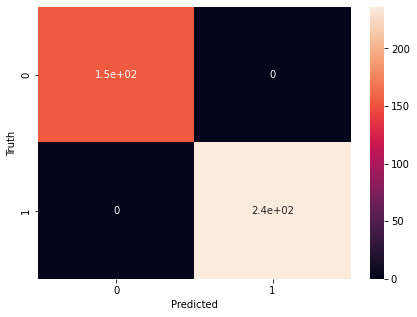

In [ ]:
pred4 = rn.predict(x_train)
cm = confusion_matrix(y_train,pred4)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.09, n_estimators=150,criterion='friedman_mse',max_depth=4)
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.09, max_depth=4, n_estimators=150)

**Score**

In [ ]:
test = 1/130
train=0.1/390
print('test error=',test)
print('train error=',train)
print('---------------------------------------------------')
print('test Accuracy', gb.score(x_test,y_test))
print('train Accuracy', gb.score(x_train,y_train))

test error= 0.007692307692307693
train error= 0.0002564102564102564
---------------------------------------------------
test Accuracy 0.9923076923076923
train Accuracy 1.0


**Confusion Matrix**

Text(42.0, 0.5, 'Truth')

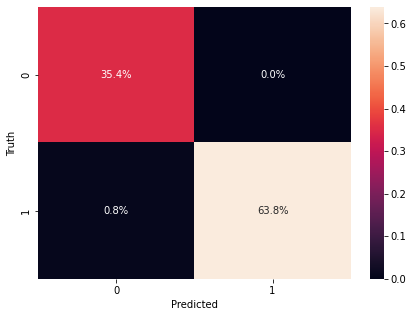

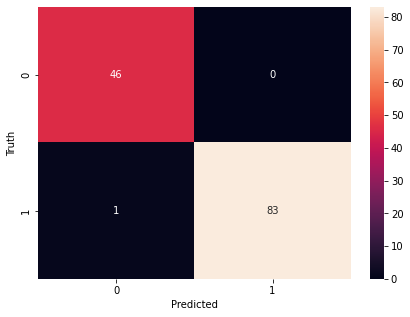

In [ ]:

pred5 = gb.predict(x_test)
cm = confusion_matrix(y_test,pred5)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(42.0, 0.5, 'Truth')

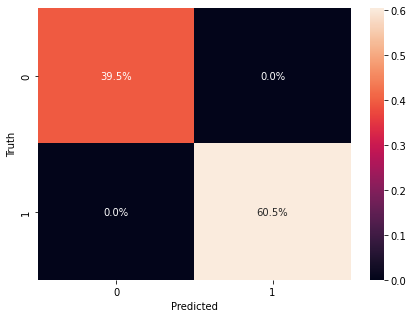

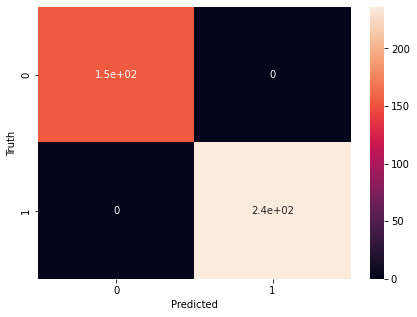

In [ ]:
pred5 = gb.predict(x_train)
cm = confusion_matrix(y_train,pred5)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Artificial Nural Network**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
NN = Sequential()

NN.add(Dense(64,activation='relu'))
NN.add(Dense(16,activation='relu'))
NN.add(Dense(8,activation='softmax'))

NN.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = NN.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 2.1536 - accuracy: 0.0000e+00 - val_loss: 2.0707 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.9747 - accuracy: 0.0929 - val_loss: 1.9149 - val_accuracy: 0.1410
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.8294 - accuracy: 0.2244 - val_loss: 1.7371 - val_accuracy: 0.4231
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.6434 - accuracy: 0.3942 - val_loss: 1.5166 - val_accuracy: 0.5385
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4198 - accuracy: 0.5481 - val_loss: 1.2657 - val_accuracy: 0.7949
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 1.1690 - accuracy: 0.7564 - val_loss: 1.0215 - val_accuracy: 0.8590
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9355 - accuracy: 0.8654 - val_loss: 0.8127 - val_accuracy: 0.8590
Epoc

In [ ]:
NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 2,264
Trainable params: 2,264
Non-trainable params: 0
_________________________________________________________________


In [ ]:
prob = NN.predict(x_test)

In [ ]:
y_pred = prob.argmax(axis=-1)

In [ ]:
prob2 = NN.predict(x_train)

In [ ]:
y_pred2 = prob2.argmax(axis=-1)

**Score**

In [ ]:
from sklearn.metrics import accuracy_score
test = 3/130
train=3/390
print('test error=',test)
print('train error=',train)
print('---------------------------------------------------')
print('test Accuracy=', accuracy_score(y_test,y_pred))
print('train Accuracy=', accuracy_score(y_train,y_pred2))

test error= 0.023076923076923078
train error= 0.007692307692307693
---------------------------------------------------
test Accuracy= 0.9769230769230769
train Accuracy= 0.9897435897435898


**Confusion Matrix**

Text(42.0, 0.5, 'Truth')

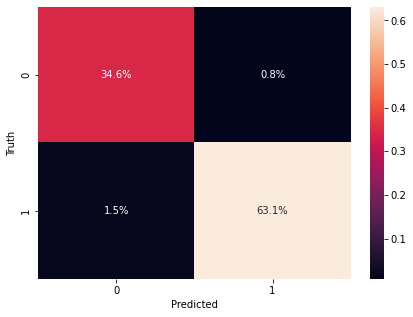

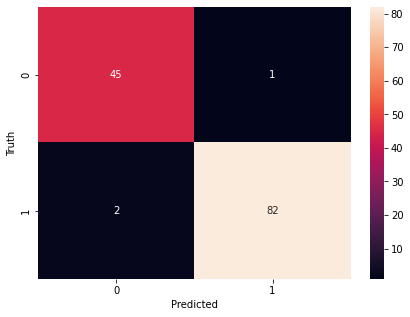

In [ ]:

y_pred = prob.argmax(axis=-1)
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(42.0, 0.5, 'Truth')

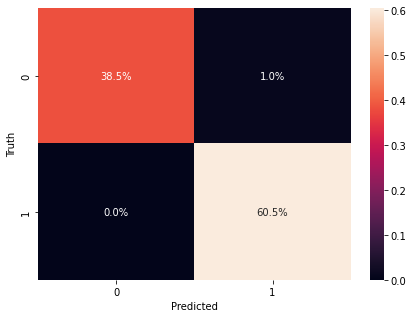

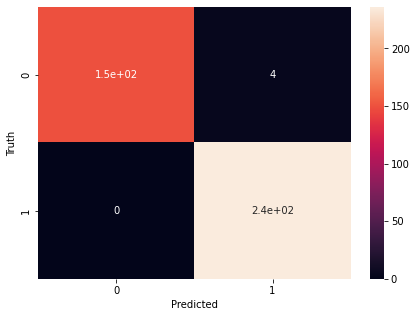

In [ ]:
y_pred2 = prob2.argmax(axis=-1)
cm = confusion_matrix(y_train,y_pred2)

plt.figure(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%',)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Plots**

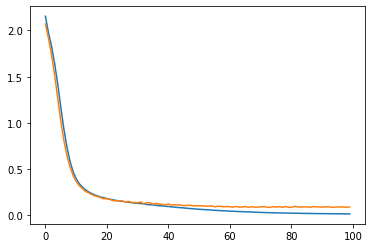

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

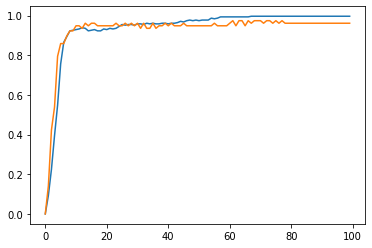

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])